In [1]:
# 1. import the modules you need

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# 2. Let's read the CSV files and create data frames

observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species_info = pd.read_csv('species_info.csv')
species_info.head()


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
# Let's see how many species are in each category
species_info.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [5]:
# 3. Let's add a column in species_info stating whether a species is in some type of danger
species_info.fillna('Not In Danger', inplace=True)
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not In Danger
1,Mammal,Bos bison,"American Bison, Bison",Not In Danger
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not In Danger
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not In Danger
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not In Danger


In [6]:
# 6. Now let's see how many species are in need of conservation (in danger)
conservation_status_counts = species_info.groupby('conservation_status').common_names.count()
conservation_status_counts

conservation_status
Endangered              16
In Recovery              4
Not In Danger         5633
Species of Concern     161
Threatened              10
Name: common_names, dtype: int64

In [7]:
conservation_category = species_info[species_info.conservation_status != 'Not In Danger']\
            .groupby(['conservation_status','category'])['scientific_name']\
            .count()\
            .unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

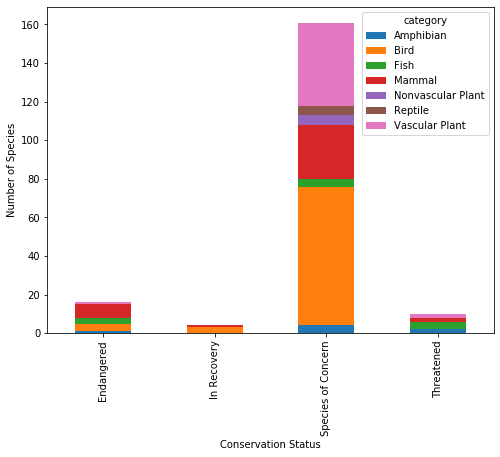

In [8]:
ax = conservation_category.plot(kind ='bar', figsize=(8,6), stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

In [9]:
#8. Let's see how many observations were made in each U.S. national park in this study
observation_counts_by_np = observations.groupby('park_name').sum()
observation_counts_by_np

,observations
park_name,
Bryce National Park,576025
Great Smoky Mountains National Park,431820
Yellowstone National Park,1443562
Yosemite National Park,863332


In [10]:
#4. Let's get a count of in danger vs. not in danger
species_info['is_protected'] = species_info.conservation_status != 'Not In Danger'

In [11]:
category_count = species_info.groupby(['category','is_protected']).scientific_name.nunique().reset_index()\
                .pivot(columns='is_protected',index='category',values='scientific_name').reset_index()
category_count.columns = ['category','not_protected','protected'] 
category_count

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [12]:
category_count['percent_protected'] = round((100 * (category_count.protected\
                                                   /(category_count.protected+category_count.not_protected))),2)

category_count

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


In [13]:
from scipy.stats import chi2_contingency
contingency_bird_mammal = [[75,413],
                [30,146]]
chi2_contingency(contingency_bird_mammal)

(0.16170148316545574,
 0.6875948096661336,
 1,
 array([[ 77.1686747, 410.8313253],
        [ 27.8313253, 148.1686747]]))

In [14]:
contingency_mammal_reptile = [[30,146],
                           [5,73]]
chi2_contingency(contingency_mammal_reptile)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In [15]:
from itertools import chain
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_reptile_names = species_info[species_info.category == 'Reptile']\
    .common_names.apply(remove_punctuation)\
    .str.split().tolist()

common_reptile_names[:6]

[['Eastern', 'Slender', 'Glass', 'Lizard'],
 ['Worm', 'Snakes', 'Wormsnakes'],
 ['Eastern', 'Worm', 'Snake'],
 ['Midwest', 'Worm', 'Snake'],
 ['Northern', 'Scarlet', 'Snake'],
 ['Northern', 'Black', 'Racer']]

In [16]:
clean_rows_reptile = []

for item in common_reptile_names:
    item = list(dict.fromkeys(item))
    clean_rows_reptile.append(item)
    
clean_rows_reptile[:6]

[['Eastern', 'Slender', 'Glass', 'Lizard'],
 ['Worm', 'Snakes', 'Wormsnakes'],
 ['Eastern', 'Worm', 'Snake'],
 ['Midwest', 'Worm', 'Snake'],
 ['Northern', 'Scarlet', 'Snake'],
 ['Northern', 'Black', 'Racer']]

In [17]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows_reptile))
res[:6]

['Eastern', 'Slender', 'Glass', 'Lizard', 'Worm', 'Snakes']

In [18]:
words_counted_reptile = []

for i in res:
    x = res.count(i)
    words_counted_reptile.append((i,x))
    
pd.DataFrame(set(words_counted_reptile), columns = ['Word','Count'])\
    .sort_values("Count", ascending=False)\
    .head(10)

,Word,Count
5,Snake,27
21,Northern,15
70,Eastern,11
9,Turtle,11
62,Lizard,9
3,Skink,7
74,Kingsnake,6
20,Garter,5
73,Western,5
69,California,4


In [19]:
species_info['is_snake'] = species_info.common_names.str.contains(r"\bSnake\b", regex= True)

species_info.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_snake
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not In Danger,False,False
1,Mammal,Bos bison,"American Bison, Bison",Not In Danger,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not In Danger,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not In Danger,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not In Danger,False,False


In [20]:
species_info[species_info.is_snake]

,category,scientific_name,common_names,conservation_status,is_protected,is_snake
363,Reptile,Carphophis amoenus amoenus,Eastern Worm Snake,Not In Danger,False,True
364,Reptile,Carphophis amoenus helenae,Midwest Worm Snake,Not In Danger,False,True
365,Reptile,Cemophora coccinea copei,Northern Scarlet Snake,Not In Danger,False,True
367,Reptile,Diadophis punctatus edwardsii,Northern Ringneck Snake,Not In Danger,False,True
368,Reptile,Elaphe guttata guttata,Corn Snake,Not In Danger,False,True
369,Reptile,Elaphe obsoleta obsoleta,Black Rat Snake,Not In Danger,False,True
370,Reptile,Heterodon platirhinos,Eastern Hognose Snake,Not In Danger,False,True
376,Reptile,Lampropeltis triangulum triangulum,Eastern Milk Snake,Not In Danger,False,True
377,Reptile,Nerodia erythrogaster,Plainbelly Water Snake,Not In Danger,False,True
378,Reptile,Nerodia erythrogaster flavigaster,"Yellowbelly Water Snake, Yellowbelly Watersnake",Not In Danger,False,True


In [21]:
snake_observations = observations.merge(species_info[species_info.is_snake])
snake_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_snake
0,Thamnophis sirtalis sirtalis,Great Smoky Mountains National Park,63,Reptile,Common Garter Snake,Not In Danger,False,True
1,Thamnophis sirtalis sirtalis,Yellowstone National Park,260,Reptile,Common Garter Snake,Not In Danger,False,True
2,Thamnophis sirtalis sirtalis,Yosemite National Park,151,Reptile,Common Garter Snake,Not In Danger,False,True
3,Thamnophis sirtalis sirtalis,Bryce National Park,108,Reptile,Common Garter Snake,Not In Danger,False,True
4,Opheodrys aestivus aestivus,Yosemite National Park,161,Reptile,Eastern Rough Green Snake,Not In Danger,False,True
...,...,...,...,...,...,...,...,...
127,Eupatorium serotinum,Bryce National Park,80,Vascular Plant,"Acuminate-Leaved Snake-Root, Late-Flowering Th...",Not In Danger,False,True
128,Cemophora coccinea copei,Great Smoky Mountains National Park,66,Reptile,Northern Scarlet Snake,Not In Danger,False,True
129,Cemophora coccinea copei,Bryce National Park,121,Reptile,Northern Scarlet Snake,Not In Danger,False,True
130,Cemophora coccinea copei,Yellowstone National Park,250,Reptile,Northern Scarlet Snake,Not In Danger,False,True


In [22]:
snake_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3344
1,Great Smoky Mountains National Park,2374
2,Yellowstone National Park,8149
3,Yosemite National Park,4823


In [23]:
snake_obs_by_park = snake_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
snake_obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,3115
1,Bryce National Park,True,229
2,Great Smoky Mountains National Park,False,2199
3,Great Smoky Mountains National Park,True,175
4,Yellowstone National Park,False,7503
5,Yellowstone National Park,True,646
6,Yosemite National Park,False,4396
7,Yosemite National Park,True,427


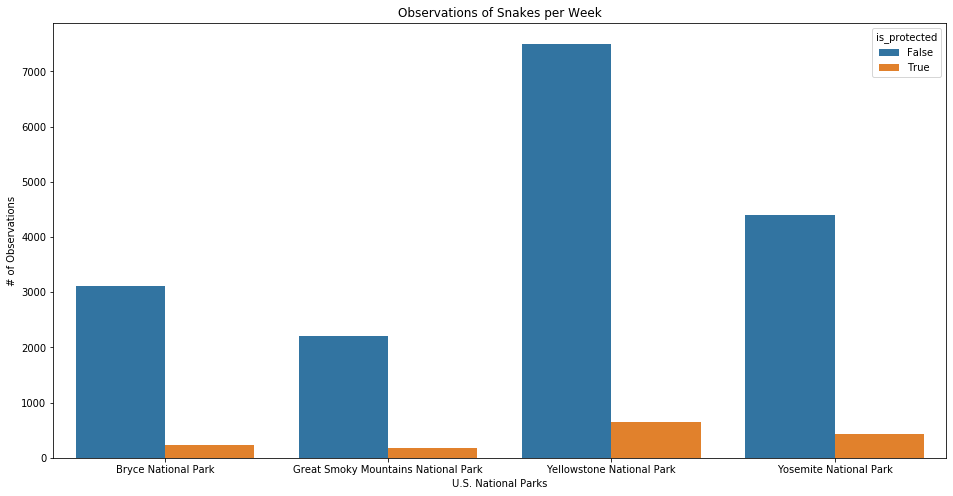

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(x=snake_obs_by_park.park_name, y=snake_obs_by_park.observations, hue=snake_obs_by_park.is_protected)
plt.xlabel('U.S. National Parks')
plt.ylabel('# of Observations')
plt.title('Observations of Snakes per Week')
plt.show()

In [25]:
common_bird_names = species_info[species_info.category == 'Bird']\
    .common_names.apply(remove_punctuation)\
    .str.split().tolist()

common_bird_names[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [26]:
clean_rows_bird = []

for item in common_bird_names:
    item = list(dict.fromkeys(item))
    clean_rows_bird.append(item)
    
clean_rows_bird[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [27]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows_bird))
res[:6]

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']

In [28]:
words_counted_bird = []

for i in res:
    x = res.count(i)
    words_counted_bird.append((i,x))
    
pd.DataFrame(set(words_counted_bird), columns = ['Word','Count'])\
    .sort_values("Count", ascending=False)\
    .head(10)

,Word,Count
456,Warbler,59
99,Sparrow,29
321,American,21
409,Northern,20
122,Owl,18
441,Flycatcher,18
75,Common,18
141,Woodpecker,12
296,Western,12
387,Sandpiper,11


In [29]:
species_info['is_warbler'] = species_info.common_names.str.contains(r"\bWarbler\b", regex= True)

species_info.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_snake,is_warbler
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not In Danger,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",Not In Danger,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not In Danger,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not In Danger,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not In Danger,False,False,False


In [30]:
species_info[species_info.is_warbler]

,category,scientific_name,common_names,conservation_status,is_protected,is_snake,is_warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not In Danger,False,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Not In Danger,False,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,Not In Danger,False,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,Not In Danger,False,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,Not In Danger,False,False,True
251,Bird,Dendroica discolor,Prairie Warbler,Not In Danger,False,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,Not In Danger,False,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,Not In Danger,False,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,Not In Danger,False,False,True
255,Bird,Dendroica palmarum,Palm Warbler,Not In Danger,False,False,True


In [31]:
warbler_observations = observations.merge(species_info[species_info.is_warbler])
warbler_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_snake,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,Not In Danger,False,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,Not In Danger,False,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,Not In Danger,False,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,Not In Danger,False,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,Not In Danger,False,False,True
...,...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,Not In Danger,False,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,Not In Danger,False,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,Not In Danger,False,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,Not In Danger,False,False,True


In [32]:
warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


In [33]:
warbler_obs_by_park = warbler_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
warbler_obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


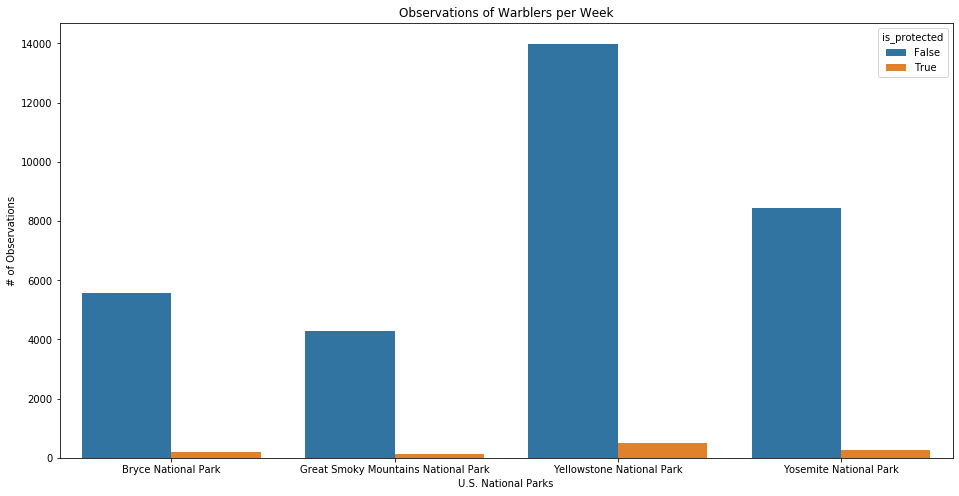

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(x=warbler_obs_by_park.park_name, y=warbler_obs_by_park.observations, hue=warbler_obs_by_park.is_protected)
plt.xlabel('U.S. National Parks')
plt.ylabel('# of Observations')
plt.title('Observations of Warblers per Week')
plt.show()